Data Preparation and Descriptive Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from a CSV file
data = pd.read_csv('stock_data.csv')

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Calculate returns
data['Returns'] = data['Close'].pct_change() * 100

# Calculate summary statistics
price_stats = data['Close'].describe()
return_stats = data['Returns'].describe()

# Print summary statistics
print("Price Statistics:\n", price_stats)
print("\nReturns Statistics:\n", return_stats)


Price Statistics:
 count    1010.000000
mean     1172.445806
std       231.644861
min       660.000000
25%       991.650024
50%      1121.750000
75%      1318.875000
max      1731.500000
Name: Close, dtype: float64

Returns Statistics:
 count    1009.000000
mean        0.035401
std         2.090395
min       -12.582781
25%        -1.119855
50%         0.109449
75%         1.057977
max        12.784333
Name: Returns, dtype: float64


 Price and Return Visualization

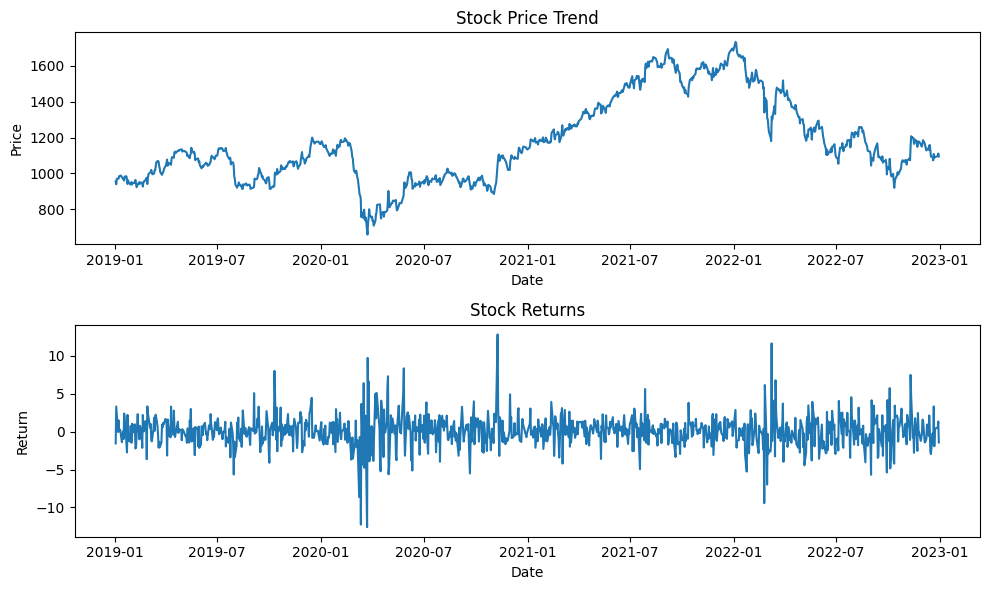

In [24]:
# Plot price and return trends
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Close'])
plt.title('Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Returns'])
plt.title('Stock Returns')
plt.xlabel('Date')
plt.ylabel('Return')

plt.tight_layout()
plt.show()


Moving Average Crossover Trading Strategy

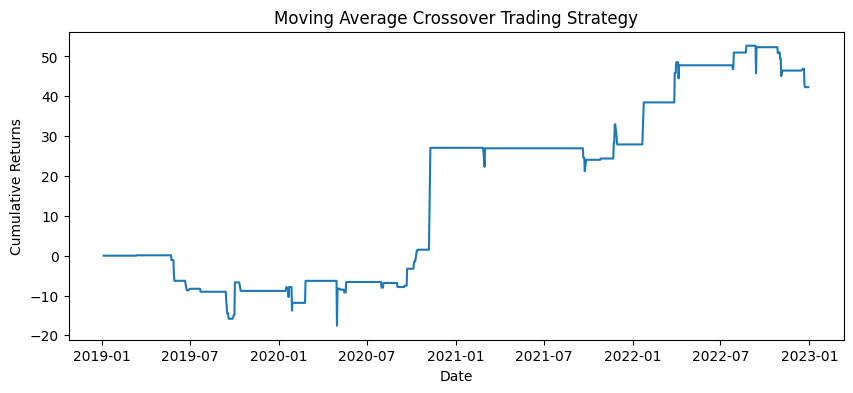

In [25]:
# Assuming short-term MA: 20 days, long-term MA: 50 days
short_ma = data['Close'].rolling(window=20).mean()
long_ma = data['Close'].rolling(window=50).mean()

# Generate trading signals
data['Signal'] = 0
data.loc[data['Close'] > long_ma, 'Signal'] = 1
data.loc[data['Close'] < long_ma, 'Signal'] = -1

# Simulate the trading strategy
data['Position'] = data['Signal'].diff()
data['Strategy Returns'] = data['Returns'] * data['Position'].shift(1)

# Calculate overall returns
data['Total Returns'] = data['Strategy Returns'].cumsum()

# Plot strategy returns
plt.figure(figsize=(10, 4))
plt.plot(data['Date'], data['Total Returns'])
plt.title('Moving Average Crossover Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


Exponential Smoothing Techniques

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Single exponential smoothing
model_single = ExponentialSmoothing(data['Close'], trend=None, seasonal=None)
model_single_fit = model_single.fit()
forecast_single = model_single_fit.forecast(steps=20)

# Double exponential smoothing (Holt's method)
model_double = ExponentialSmoothing(data['Close'], trend='add', seasonal=None)
model_double_fit = model_double.fit()
forecast_double = model_double_fit.forecast(steps=20)

# Winter's method (Triple exponential smoothing)
model_winter = ExponentialSmoothing(data['Close'], trend='add', seasonal='add', seasonal_periods=4)
model_winter_fit = model_winter.fit()
forecast_winter = model_winter_fit.forecast(steps=20)

# Compare forecasts with actual prices
test_set = data[-20:]
forecast_comparison = pd.DataFrame({'Actual': test_set['Close'],
                                    'Single Exponential Smoothing': forecast_single,
                                    'Double Exponential Smoothing': forecast_double,
                                    'Winter\'s Method': forecast_winter})

print(forecast_comparison)


      Actual  Single Exponential Smoothing  Double Exponential Smoothing  \
990   1167.5                           NaN                           NaN   
991   1185.0                           NaN                           NaN   
992   1168.0                           NaN                           NaN   
993   1152.0                           NaN                           NaN   
994   1138.5                           NaN                           NaN   
995   1128.0                           NaN                           NaN   
996   1138.5                           NaN                           NaN   
997   1132.0                           NaN                           NaN   
998   1156.0                           NaN                           NaN   
999   1158.0                           NaN                           NaN   
1000  1127.5                           NaN                           NaN   
1001  1094.0                           NaN                           NaN   
1002  1091.5

Regression Analysis and CAPM

In [47]:
from sklearn.linear_model import LinearRegression

# Assuming competitor data is in a CSV file named 'competitor_data.csv'
competitor_data = pd.read_csv('competitor2_data.csv')
# Read the main dataset
data = pd.read_csv('stock_data.csv')

# Convert the 'Date' column to datetime type in both datasets
data['Date'] = pd.to_datetime(data['Date'])
competitor_data['Date'] = pd.to_datetime(competitor_data['Date'])

# Concatenate the datasets along the columns axis
merged_data = pd.concat([data.set_index('Date'), competitor_data.set_index('Date')], axis=1)

# Perform regression analysis
regression_model = LinearRegression()
X = merged_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y = merged_data['Close']
regression_model.fit(X, y)

# Get regression coefficients
intercept = regression_model.intercept_
slopes = regression_model.coef_

# CAPM analysis
risk_free_rate = 0.05
market_risk_premium = 0.08
beta = regression_model.coef_

expected_return = risk_free_rate + sum(beta * market_risk_premium)

print("Intercept:", intercept)
print("Slopes:", slopes)
print("Expected Return:", expected_return)

Intercept: [-4.82032192e-11  2.61479727e-12]
Slopes: [[-2.53650752e-16 -2.25629926e-15  2.91616782e-15  1.59879288e-14
  -3.37970944e-15 -2.66407315e-16  1.00000000e+00 -2.21171908e-14
  -3.00344415e-15  7.67715696e-15  5.47759266e-17 -1.38913403e-18]
 [-3.10586635e-16 -7.07103782e-15 -1.25515172e-16  7.88001123e-15
   9.00403708e-16 -8.78249569e-16 -5.90972441e-16  1.00000000e+00
   1.19984816e-16 -1.64167915e-16 -2.89642916e-18  7.11507676e-20]]
Expected Return: [0.05 0.05 0.05 0.05 0.05 0.05 0.13 0.13 0.05 0.05 0.05 0.05]
